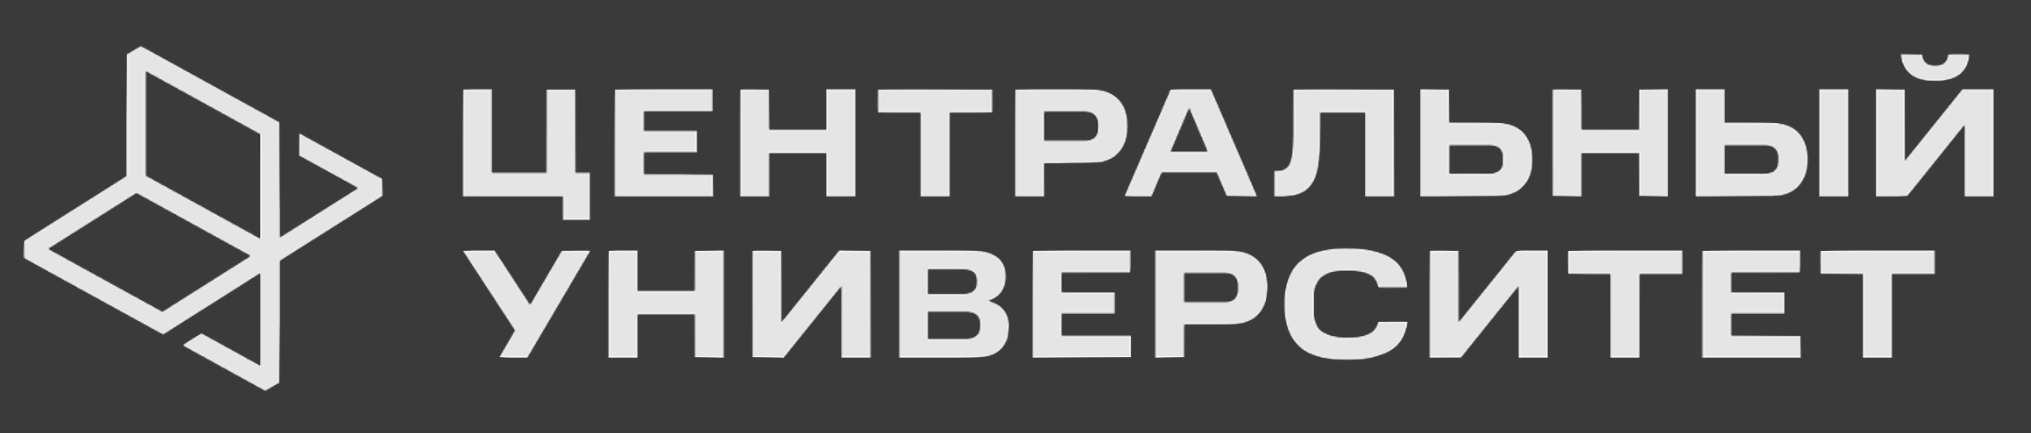

# Домашняя работа по теме «Вероятностное обучение»

Это домашнее задание состоит из двух блоков:

* в первом мы сгенерируем  выборку данных, на основе которой нужно выполнить 6 задач;
* во втором используется готовый набор данных, нужно выполнить 2 задачи.

Прежде чем приступить к задачам, импортируй библиотеки:


In [4]:
import plotly.graph_objects as go
import numpy                as np
import pandas               as pd

import kagglehub
import itertools
import random
import os

np.random.seed(52)

## Блок 1. Мешок с шариками

Чтобы сформулировать условия для следующих задач, сделаем два шага:

1. Определим исходные вероятности для следующей задачи:
> В мешке лежат шарики различных цветов: красного, синего, зелёного и жёлтого — и разного размера: большие, средние и маленькие. Таким образом, из мешка можно вытащить, например, красный большой, жёлтый маленький или другие сочетания — всего возможны 12 типов.

2. Воспользуемся набором вероятностей, полученных на предыдущем шаге,  и сгенерируем случайную выборку шариков разного типа. Для этой выборки получим частотную вероятность появления каждого типа шариков (она будет различна для каждого студента).

<!-- 3. Вычислим частотную вероятность для каждого типа шариков и сравним ее с исходным набором вероятностей. -->




<!-- 1. Определим вероятность выпадения каждого типа шариков;

2. Воспользуемся набором вероятностей и сгенерируем случайную выборку шариков разного типа;

3. Вычислим частотную вероятность для каждого типа шариков и сравним ее иходным набором вероятностей.



> **Частотная вероятность** показывает, как часто встречаются шарики разных типов в твоей выборке. -->

<!-- ## Задача 1. Бассейн с шариками

В мешке лежит шарики красного, синего, зеленого и желтого цвета, а также разного размера большие, средние и маленькие. Сгенерируем вероятность выпадения каждой из групп шариков. Далее вам предлагается сгенерировать выборку шариков, вычислить частотную вероятность для каждого их классов.
Частотная вероятность используется далее для ваших ответов и именно она, поэтому ваши ответы будут разными. -->

### 1. Подсчёт исходных вероятностей

In [6]:
ball_color_s = ['red', 'blue', 'green', 'yellow']
ball_size_s  = ['small', 'medium', 'big']

ball_type_s = list(itertools.product(ball_color_s, ball_size_s))

color_probability_s = np.random.dirichlet(np.ones(len(ball_color_s)), size=1)[0]
size_probability_s  = np.random.dirichlet(np.ones(len(ball_size_s )), size=1)[0]

ball_probability_s = np.outer(color_probability_s, size_probability_s ).flatten()

ball_probability_s = dict(zip(ball_type_s, ball_probability_s))

In [9]:
ball_probability_s

{('red', 'small'): np.float64(0.15281012279185185),
 ('red', 'medium'): np.float64(0.15289919317535805),
 ('red', 'big'): np.float64(0.05709986303165432),
 ('blue', 'small'): np.float64(0.18579466532836664),
 ('blue', 'medium'): np.float64(0.18590296183249772),
 ('blue', 'big'): np.float64(0.06942504690420596),
 ('green', 'small'): np.float64(0.03477735091285231),
 ('green', 'medium'): np.float64(0.03479762203054101),
 ('green', 'big'): np.float64(0.01299509441813976),
 ('yellow', 'small'): np.float64(0.047803794612588824),
 ('yellow', 'medium'): np.float64(0.04783165861951063),
 ('yellow', 'big'): np.float64(0.017862626342433012)}

Вычислим вероятности выпадения каждой из групп шариков:

In [16]:
for color_type, probability in ball_probability_s.items():
    print(f'P( {color_type[0]: <7} {color_type[1]: <7}) = {probability}')
ball_probability_s

P( red     small  ) = 0.15281012279185185
P( red     medium ) = 0.15289919317535805
P( red     big    ) = 0.05709986303165432
P( blue    small  ) = 0.18579466532836664
P( blue    medium ) = 0.18590296183249772
P( blue    big    ) = 0.06942504690420596
P( green   small  ) = 0.03477735091285231
P( green   medium ) = 0.03479762203054101
P( green   big    ) = 0.01299509441813976
P( yellow  small  ) = 0.047803794612588824
P( yellow  medium ) = 0.04783165861951063
P( yellow  big    ) = 0.017862626342433012


{('red', 'small'): np.float64(0.15281012279185185),
 ('red', 'medium'): np.float64(0.15289919317535805),
 ('red', 'big'): np.float64(0.05709986303165432),
 ('blue', 'small'): np.float64(0.18579466532836664),
 ('blue', 'medium'): np.float64(0.18590296183249772),
 ('blue', 'big'): np.float64(0.06942504690420596),
 ('green', 'small'): np.float64(0.03477735091285231),
 ('green', 'medium'): np.float64(0.03479762203054101),
 ('green', 'big'): np.float64(0.01299509441813976),
 ('yellow', 'small'): np.float64(0.047803794612588824),
 ('yellow', 'medium'): np.float64(0.04783165861951063),
 ('yellow', 'big'): np.float64(0.017862626342433012)}

Вероятности выпадения каждого цвета:

In [11]:
from collections import defaultdict

color_probability_s = defaultdict(float)
for (color_, type_), value in ball_probability_s.items():
    color_probability_s[color_] += value

for color_, probability in color_probability_s.items():
    print(f'P( {color_: <7}) = {probability}')

P( red    ) = 0.3628091789988642
P( blue   ) = 0.44112267406507033
P( green  ) = 0.08257006736153308
P( yellow ) = 0.11349807957453248


И вероятности выпадения каждого размера:

In [18]:
from collections import defaultdict

type_probability_s = defaultdict(float)
for (color_, type_), value in ball_probability_s.items():
    type_probability_s[type_] += value

for type_, probability in type_probability_s.items():
    print(f'P( {type_: <7}) = {probability}')

print(type_probability_s)

P( small  ) = 0.42118593364565965
P( medium ) = 0.42143143565790736
P( big    ) = 0.15738263069643307
defaultdict(<class 'float'>, {'small': np.float64(0.42118593364565965), 'medium': np.float64(0.42143143565790736), 'big': np.float64(0.15738263069643307)})




#### Задача 1.1 [1 балл]

Какова вероятность того, что вытянутый шарик будет зелёным, если известно, что он точно не красный?

<!-- Какова вероятность того, что вытянутый шарик зелёного цвета, при условии, что это не красный шарик? -->


In [13]:
not_red_prob = 1 - color_probability_s['red']
p_green_not_red = color_probability_s['green'] / not_red_prob
p_green_not_red

np.float64(0.1295845210572892)

#### Задача 1.2 [1 балл]
Какова вероятность вытянуть шарик, который либо красный, либо жёлтый?

In [14]:
color_probability_s['red'] + color_probability_s['yellow']

np.float64(0.47630725857339673)

#### Задача 1.3 [1 балл]

Если вытянуть один шарик, вернуть его в мешок и затем вытянуть второй шарик, какова вероятность того, что оба шарика будут синими?

In [15]:
color_probability_s['blue'] * color_probability_s['blue']

np.float64(0.19458921357431827)

#### Задача 1.4 [1 балл]

Ты наугад вытягиваешь один шарик, и он оказывается большим. Какова вероятность того, что этот шарик красный?

In [ ]:
big_prob = type_probability_s['big']
big_red_prob = ball_probability_s[('red', 'big')] / big_prob
big_red_prob

np.float64(0.36280917899886417)

### Генерация выборки из 100 шариков
Сгенерируем случайную выборку из 100 шариков красного, синего, зелёного и жёлтого цвета.

In [22]:
def generate_multinomial_samples(ball_probability_s, n = 100):
    color_s       = list(ball_probability_s.keys  ())
    probability_s = list(ball_probability_s.values())

    # Генерируем случайную выборку
    random_sample_s = random.choices(color_s, weights = probability_s, k = n)
    return random_sample_s

random_sample_s = generate_multinomial_samples(ball_probability_s)

In [23]:
random_sample_s[0]

('yellow', 'medium')

#### Задача 1.5 [1 балл]

Построй гистограмму выборки шариков по цветам. Каждый столбик должен соответствовать своему цвету:
* красный,
* синий,
* зелёный,
* жёлтый.


<!-- #### Задача 1.1 [1 балл]

Нарисуй гистограмму нашей выборки шаров разного цвета. Каждый столбик имеет соответствующий цвет (красный, синий, зеленый, оранжевый). -->

In [24]:
import seaborn as sns

<Axes: ylabel='Count'>

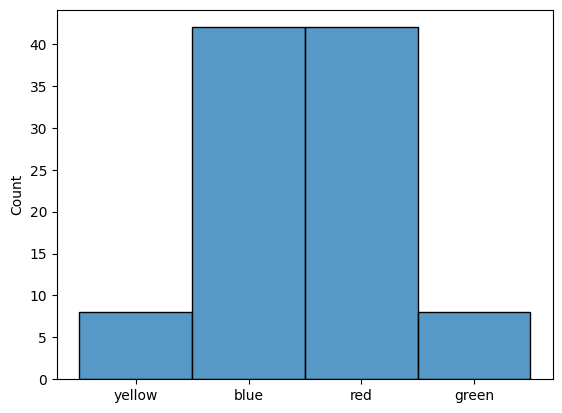

In [26]:
sns.histplot(list(map(lambda item: item[0], random_sample_s)))

Построй гистограмму выборки шариков по размеру. Подпиши столбики:
* маленький,
* средний,
* большой.

<!-- Нарисуйте гистограмму нашей выборки шаров разного размера. Подпишите каждый столбик (маленький, средний, большой). -->

<Axes: ylabel='Count'>

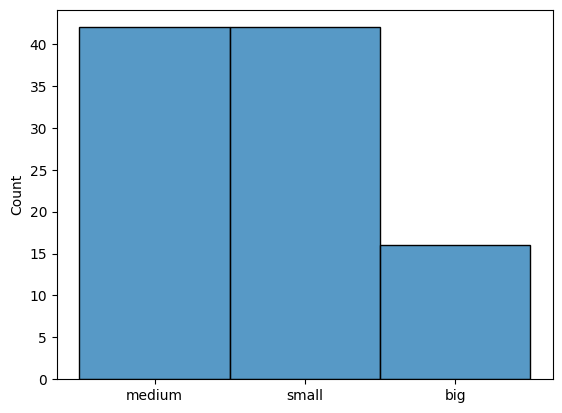

In [27]:
sns.histplot(list(map(lambda item: item[1], random_sample_s)))

#### Задача 1.6 [1 балл]
Рассчитай частотную вероятность цвета каждого из типа шариков. Сравни с исходной вероятностью, которая использовалась при генерации выборки.

In [31]:
lg = ball_type_s.__len__()

for item in ball_type_s:
    prob = random_sample_s.count(item) / len(random_sample_s)
    print(f"{item} : new = {prob} | prev = {ball_probability_s[item]}")

('red', 'small') : new = 0.19 | prev = 0.15281012279185185
('red', 'medium') : new = 0.16 | prev = 0.15289919317535805
('red', 'big') : new = 0.07 | prev = 0.05709986303165432
('blue', 'small') : new = 0.16 | prev = 0.18579466532836664
('blue', 'medium') : new = 0.17 | prev = 0.18590296183249772
('blue', 'big') : new = 0.09 | prev = 0.06942504690420596
('green', 'small') : new = 0.03 | prev = 0.03477735091285231
('green', 'medium') : new = 0.05 | prev = 0.03479762203054101
('green', 'big') : new = 0.0 | prev = 0.01299509441813976
('yellow', 'small') : new = 0.04 | prev = 0.047803794612588824
('yellow', 'medium') : new = 0.04 | prev = 0.04783165861951063
('yellow', 'big') : new = 0.0 | prev = 0.017862626342433012


в сравнении с исходной вероятностью, в целом... что-то похожее но разброс имеется. стоило, наверное, побольше выборку нагенерировать

## Блок 2. Задача регрессии на наборе данных `Diabetes Dataset`
Diabetes Dataset — это набор данных для задач регрессии, применяемый в машинном обучении и статистике. Он используется для установления взаимосвязи между медицинскими характеристиками и прогрессированием заболевания.

Информация о наборе данных:

- **Источник:** модуль sklearn.datasets, основанный на реальных медицинских исследованиях.

- **Применение:** прогнозирование прогрессирования диабета через год на основе исходных медицинских показателей.

- **Характеристики:**
   * Размер выборки — 442 пациента.
   * Целевая  (зависимая) переменная — прогрессирование заболевания. Это количественная мера прогрессирования диабета через год после исходных измерений (она непрерывна).
   * Характеристики (независимые переменные) — 10 исходных переменных:

<!-- Diabetes Dataset - это широко используемый в машинном обучении и статистике набор данных, предназначенный для решения задачи регрессии. Он ориентирован на прогнозирование прогрессирования диабета на основе различных исходных переменных. Этот набор данных особенно полезен для понимания взаимосвязи между медицинскими характеристиками и прогрессированием заболевания, что делает его распространенным выбором для регрессионного анализа и оценки моделей.
Обзор набора данных: -->

  <!-- Источник: набор данных — это часть модуля sklearn.datasets. Этот набор создан на основе реальных медицинских исследований.
  Цель: прогнозирование прогрессирования диабета через год на основе исходных медицинских показателей.

  Размер:
        Характеристики: 10 исходных переменных (непрерывных и стандартизированных).
        Выборки: 442 пациента.
        Целевая переменная: непрерывная мера прогрессирования заболевания диабетом.

Характеристики (независимые переменные):\ -->

| | |
|----|----|
 |   Age    | Возраст пациента (стандартизированный)|
  |  Sex    | Пол пациента (стандартизированный)|
  |  BMI    | Индекс массы тела, показатель содержания жира в организме, основанный на весе и росте|
   | BP     | Среднее артериальное давление|
  |  S1 - S6| Шесть измерений сыворотки крови, включая холестерин и другие биомаркеры|


Характеристики были нормализованы: среднее значение приведено к `0`, а  стандартное отклонение — к `1`. Это упрощает их использование в регрессионных моделях.

<!-- Характеристики были нормализованы, чтобы среднее значение было равно `0`, а стандартное отклонение `1`, что упрощает их использование в регрессионных моделях. -->

<!-- Целевая переменная, или зависимая переменная:

  > **Прогрессирование заболевания** — это количественная мера прогрессирования диабета через год после исходных измерений. Это непрерывная переменная, которая служит выходом или целью для прогнозирования. -->

#### Задача 2.1 [2 балла]
1. Загрузи набор данных.

In [32]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()


2. Построй распределения признаков и предположи, какое это распределение — дискретное или непрерывное, мультиномиальное или нормальное.
3. Напиши выводы.

<!-- Загрузите набор данных. Постройте распределения отдельных признаков и сделайте предположения о распределении - дискретное или непрерывное, мультиномиальное, нормальное. Свой выводы напишите. -->

In [33]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [34]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [35]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'bp'}>, <Axes: title={'center': 's1'}>,
        <Axes: title={'center': 's2'}>],
       [<Axes: title={'center': 's3'}>, <Axes: title={'center': 's4'}>,
        <Axes: title={'center': 's5'}>],
       [<Axes: title={'center': 's6'}>, <Axes: >, <Axes: >]], dtype=object)

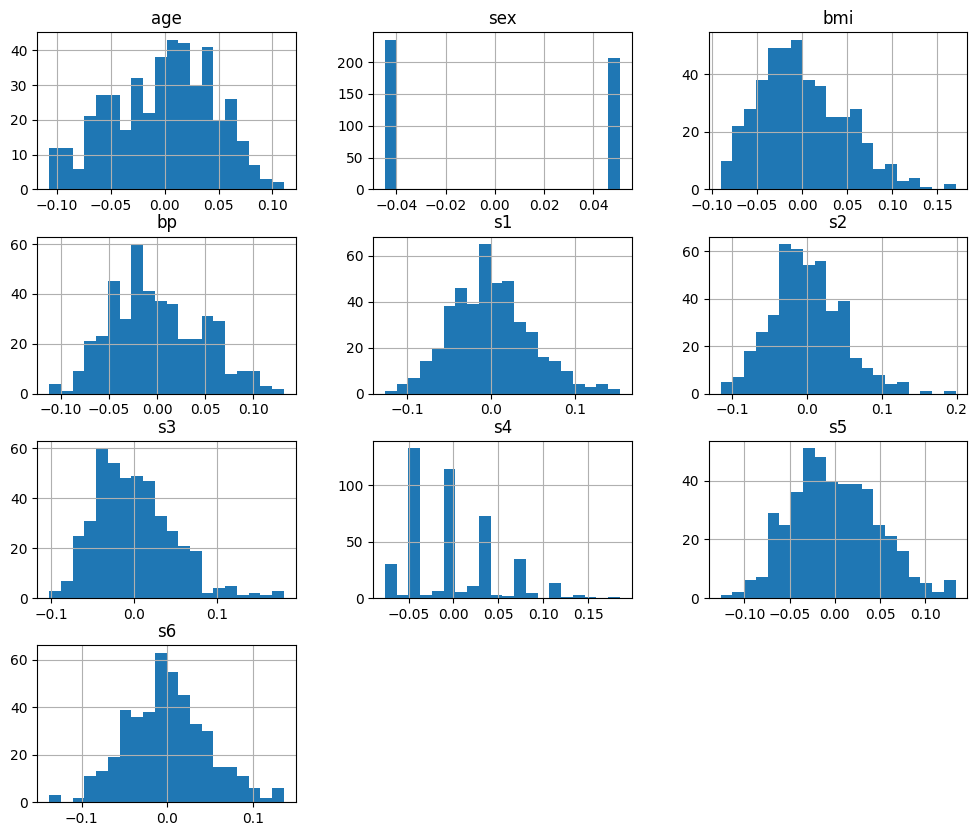

In [40]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df.hist(figsize=(12, 10), bins=20)


age - нормальное дискретное
sex - мультиномиальное дискретное
bmi - непрерывное нормальное
bp - непрерывное нормальное
s1 - непрерывное нормальное
s2 - непрерывное нормальное
s3 - непрерывное нормальное
s4 - непрерывное мультиномиальное
s5 - непрерывное нормальное
s6 - непрерывное нормальное

#### Задача 2.2 [4 балла]

1. Разбей выборку на тренировочную (80%) и тестовую (20%) с помощью  функции `train_test_split`. **[1 балл]**
2. Настрой модель линейной регрессии, которую рассматривали на семинаре. **[1 балл]**
3. Попробуй разные признаки и выбери те, которые дают минимальную ошибку `mean_squared_error` на тестовой выборке. **[1 балл]**
4. Убедись, что разница между предсказанием и истинным значением (невязка) имеет нормальное распределение. Для этого посчитай невязку на всех объектах тестовой выборки и построй гистограмму полученных значений. График похож на нормальное распределение? **[1 балл]**

<!-- Разбейте выборку на тренировочную и тестовую (80% тренировочная, 20% тестовая). Настройте модель линейно регрессии, рассмотренную на семинаре. Исследуйте разные признаки и выберите такие, которые на тестовой выборке дают минимальную ошибку `mean_squared_error`. Убедитесь, что невязка (разница, между предсказанием и истинным значением) имеет нормальное распределение -->

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df,
    diabetes.target, 
    random_state=42,
    shuffle=True,
    test_size=0.2,
    train_size=0.8
)

In [53]:
model = LinearRegression(n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [54]:
import plotly.express as px
from itertools import combinations

In [55]:
min_mse = float('inf')
best_features = []

for i in range(1, len(diabetes.feature_names) + 1):
    for columns in combinations(diabetes.feature_names, i):
        temp_train_df = X_train[list(columns)]
        temp_test_df = X_test[list(columns)]

        model.fit(temp_train_df, y_train)        
        temp_y_pred = model.predict(temp_test_df)

        mse = mean_squared_error(y_test, temp_y_pred)
        if mse < min_mse:
            min_mse = mse
            best_features = list(columns)

In [56]:
best_features

['sex', 'bmi', 's3', 's5', 's6']

In [58]:
best_model = LinearRegression(n_jobs=-1)

best_train = X_train[best_features]
best_test = X_test[best_features]

best_model.fit(best_train, y_train)
best_predict = best_model.predict(best_test)

In [59]:
delta = best_predict - y_test

px.histogram(delta)

да, это похоже на нормальное распределение.